# Libraries

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import networkx as nx
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [ ]:
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
#link data=https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?utm_source=chatgpt.com
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [ ]:
df = pd.read_csv(f"{path}/creditcard.csv")

# PreProcessing

In [ ]:
df.head()


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
df.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

# Data Preparation

In [ ]:
def handle_missing_data(data):
    df_cleaned = data.copy()

    missing_values = df_cleaned.isnull().sum()
    print("Missing values before handling:")
    print(missing_values[missing_values > 0])

    num_cols = df_cleaned.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        if df_cleaned[col].isnull().sum() > 0:
            median_val = df_cleaned[col].median()
            df_cleaned[col].fillna(median_val, inplace=True)

    return df_cleaned

In [ ]:
df = handle_missing_data(df)

duplicate_count = df.duplicated().sum()
print(f"Number of duplicates: {duplicate_count}")

if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicate_count} duplicates")
else:
    print("No duplicates found")

Missing values before handling:
Series([], dtype: int64)
Number of duplicates: 1081
Removed 1081 duplicates


In [ ]:
def handle_outliers_iqr(data, column):

    if column == 'Class':
        return data

    if column == 'Time':

        lower_bound = data[column].quantile(0.01)
        upper_bound = data[column].quantile(0.99)
    else:

        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    return data

In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols = numerical_cols.drop('Class')

for col in numerical_cols:
    df = handle_outliers_iqr(df, col)

print("Remaining missing values:", df.isnull().sum().sum())

Remaining missing values: 0


In [ ]:
numerical_cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
df.shape

(283726, 31)

In [ ]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [ ]:
df.describe()

Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94813.554348       0.079902       0.046775       0.027858   
std     47438.640431       1.590245       1.119493       1.368971   
min      2426.250000      -4.263980      -2.701226      -3.764645   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    170557.750000       2.454930       2.901188       3.901923   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.030700      -0.001586      -0.092059       0.009550   
std         1.309182       1.075933       1.001754       0.863909   
min        -3.234807      -2.642901      -2.517765      -2.236984   
25%        -0.850134      -0.689830      -0.769031      -0.552509   
50%        -0.022248      -0.053468      -0.275168       0.040859   
75%         0.739647       0.612218       0.396792       0.570474   
max         3.124319       2.565290       2.145527       2.254949   

                  V8             V9  ...            V21            V22  \
count  283726.000000  283726.000000  ...  283726.000000  283726.000000   
mean        0.067589      -0.016661  ...      -0.015089       0.001708   
std         0.484007       1.018057  ...       0.323652       0.707221   
min        -1.010627      -2.504517  ...      -0.850053      -2.149117   
25%        -0.208828      -0.644221  ...      -0.228305      -0.542700   
50%         0.021898      -0.052596  ...      -0.029441       0.006675   
75%         0.325704       0.595977  ...       0.186194       0.528245   
max         1.127502       2.456273  ...       0.807941       2.134663   

                 V23            V24            V25            V26  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.004527       0.002329       0.003511      -0.003944   
std         0.266866       0.594252       0.492971       0.467431   
min        -0.625881      -1.545741      -1.319714      -1.177300   
25%        -0.161703      -0.354453      -0.317485      -0.326763   
50%        -0.011159       0.041016       0.016278      -0.052172   
75%         0.147748       0.439738       0.350667       0.240261   
max         0.611926       1.631026       1.352896       1.090798   

                 V27            V28         Amount          Class  
count  283726.000000  283726.000000  283726.000000  283726.000000  
mean        0.012986       0.011289      51.893200       0.001667  
std         0.164936       0.124060      61.913921       0.040796  
min        -0.313414      -0.249459       0.000000       0.000000  
25%        -0.070641      -0.052818       5.600000       0.000000  
50%         0.001479       0.011288      22.000000       0.000000  
75%         0.091208       0.078276      77.510000       0.000000  
max         0.333982       0.274917     185.375000       1.000000  

[8 rows x 31 columns]

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(19)

In [ ]:
df.drop_duplicates(inplace=True, ignore_index=True)

# Data Visualization

In [ ]:
class_counts = df['Class'].value_counts()
fig1 = px.pie(values=class_counts.values,
              names=['Non-Fraud', 'Fraud'],
              title='Class Distribution (0: Non-Fraud, 1: Fraud)',
                            width=1100, height=700,
              color_discrete_sequence=['#ffb6c1', '#ff69b4'])
fig1.update_traces(textinfo='percent+value', pull=[0, 0.2])
fig1.show()

In [ ]:
fig2 = px.histogram(df, x='Time', color='Class',
                   title='Transaction Time Distribution by Class',
                   labels={'Time': 'Time (Seconds)', 'count': 'Count' },
                   color_discrete_sequence=['#db7093', '#dda0dd'],
                   opacity=0.7, nbins=50)
fig2.update_traces(marker_line_width=0.2, marker_line_color='black')
fig2.update_layout(barmode='overlay')
fig2.show()

In [ ]:
fig3 = px.histogram(df, x='Amount', color='Class',
                   title='Transaction Amount Distribution by Class (Log Scale)',
                   labels={'Amount': 'Amount', 'count': 'Count'},
                   color_discrete_sequence=['#ff69b4', '#ba55d3'],
                   opacity=0.7, nbins=50, log_y=True)

fig3.update_layout(barmode='overlay')
fig3.show()

In [ ]:
corr = df.corr()
corr_class = corr['Class'].sort_values(ascending=False)
print(corr_class)

Class     1.000000
V11       0.093834
V4        0.081292
V2        0.065413
V21       0.046242
V27       0.031905
V8        0.027344
V19       0.026578
V20       0.026129
V28       0.023674
Amount    0.004662
V25       0.004599
V26       0.004220
V22       0.002716
V15      -0.002875
V13      -0.003806
V23      -0.004783
V24      -0.007354
Time     -0.012369
V5       -0.038601
V6       -0.045998
V18      -0.046619
V1       -0.055442
V9       -0.062356
V17      -0.067780
V16      -0.068210
V7       -0.068891
V10      -0.080630
V12      -0.081659
V14      -0.084593
V3       -0.086322
Name: Class, dtype: float64


In [ ]:
corr = df.corr()
fig4 = px.imshow(corr.iloc[:10, :10], width= 900, height= 700,
                title='Correlation Matrix (First 10 Features)',
                color_continuous_scale= [
                    [0, "#fddde6"],
                    [0.5, "#ffb6c1"],
                    [1, "#ba55d3"]
                ])
fig4.show()

In [ ]:
fig5 = px.scatter_3d(df.sample(frac=0.1), x='Time', y='Amount', z='Class',
                     color='Class', title='3D View: Time vs Amount vs Class',
                     color_discrete_map= { 0 : '#FFC0CB', 1 : '#FF69B4', 2 : '#FF1493'})
fig5.show()

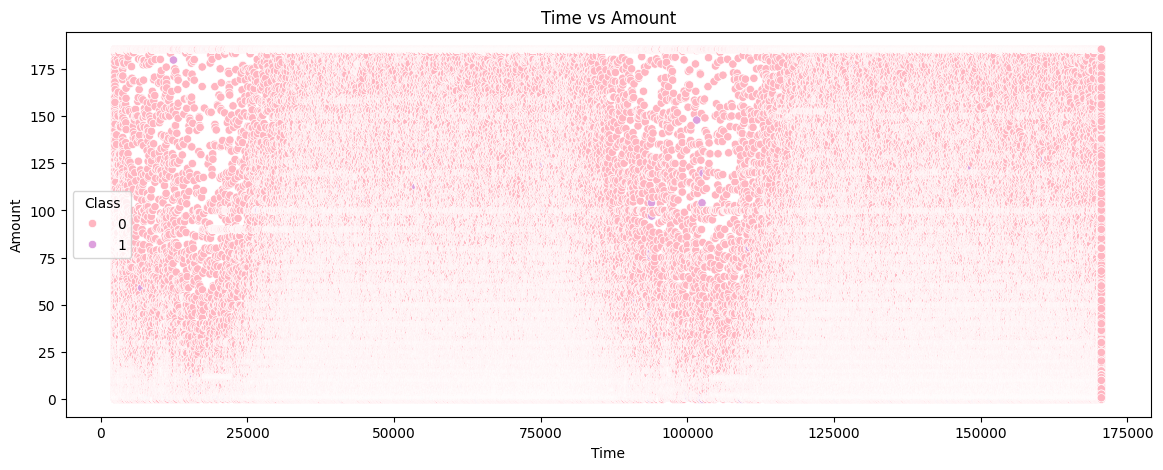

In [ ]:
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette=['lightpink' , 'plum'])
plt.title('Time vs Amount')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

Text(0, 0.5, 'Amount')

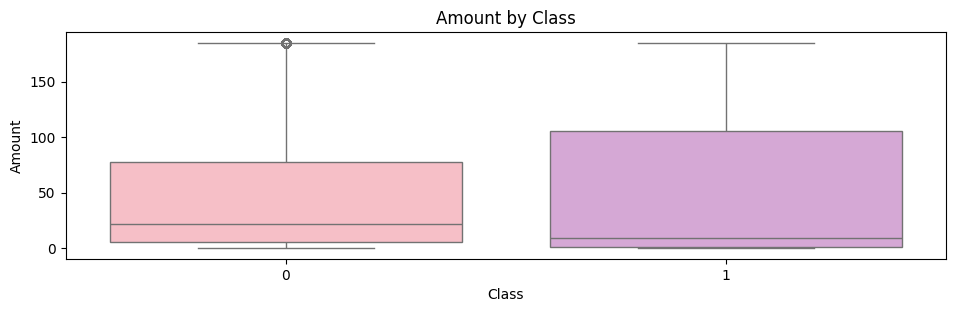

In [ ]:
plt.figure(figsize=(25, 10))

plt.subplot(3, 2, 1)
sns.boxplot(x='Class', y='Amount', data=df , palette= ["lightpink" , 'plum'])
plt.title('Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')

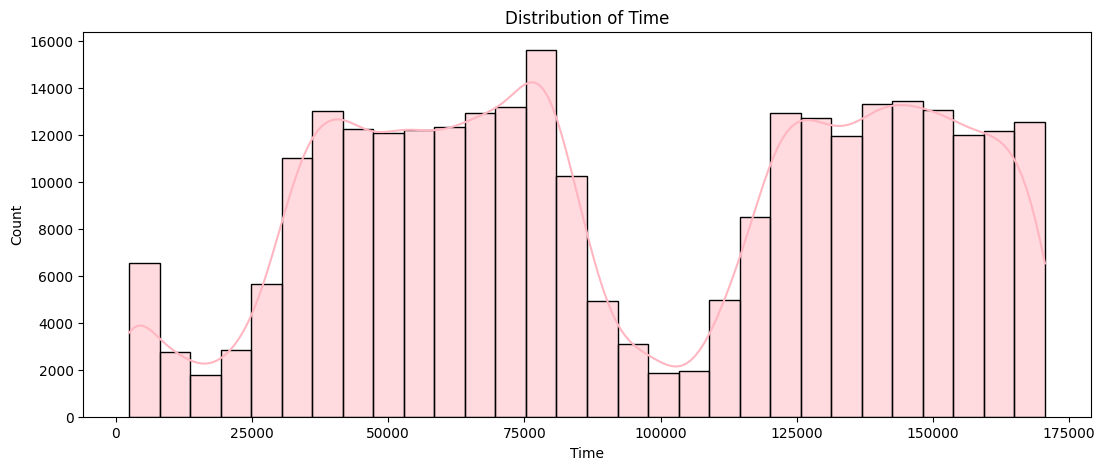

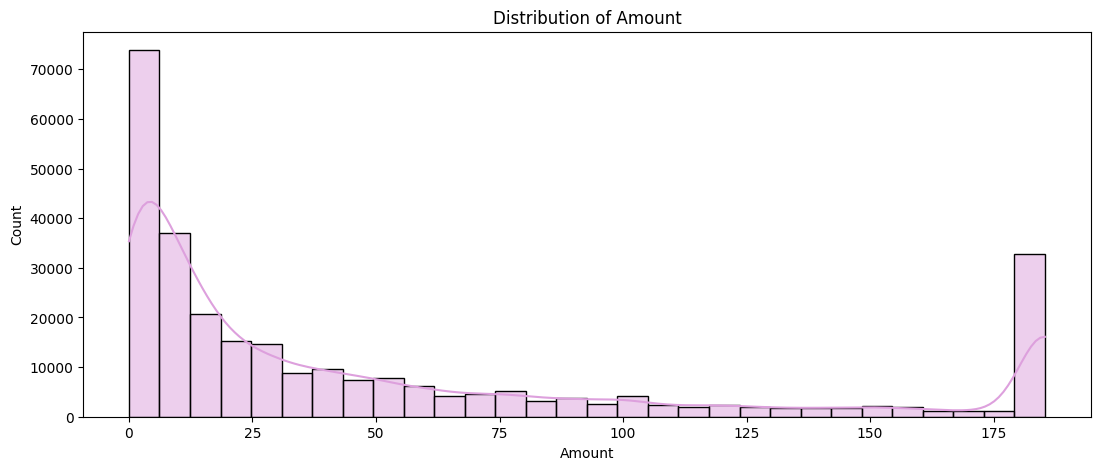

In [ ]:
num_cols=["Time","Amount"]
colors = ["lightpink", "plum"]

for i, col in enumerate(num_cols):
    plt.figure(figsize=(13, 5))
    sns.histplot(df[col], kde=True, bins=30, color=colors[i])
    plt.title(f"Distribution of {col}")
plt.show()

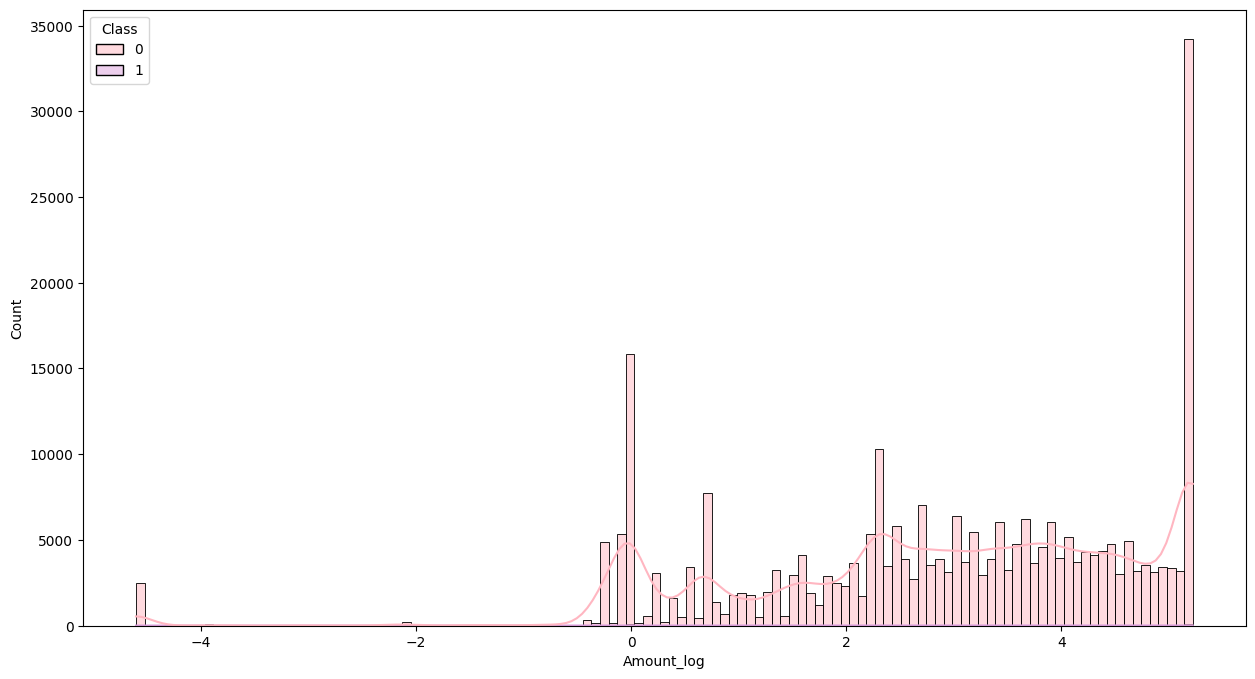

In [ ]:
df_cleaned = df.drop_duplicates().copy()
df_cleaned["Amount_log"] = np.log(df_cleaned["Amount"].replace(0, 0.01))

plt.figure(figsize=(15, 8))
sns.histplot(
    data=df_cleaned,
    x="Amount_log",
    hue="Class",
    log_scale=False,
    kde=True,
    palette=["lightpink", "plum"],
)
plt.show()

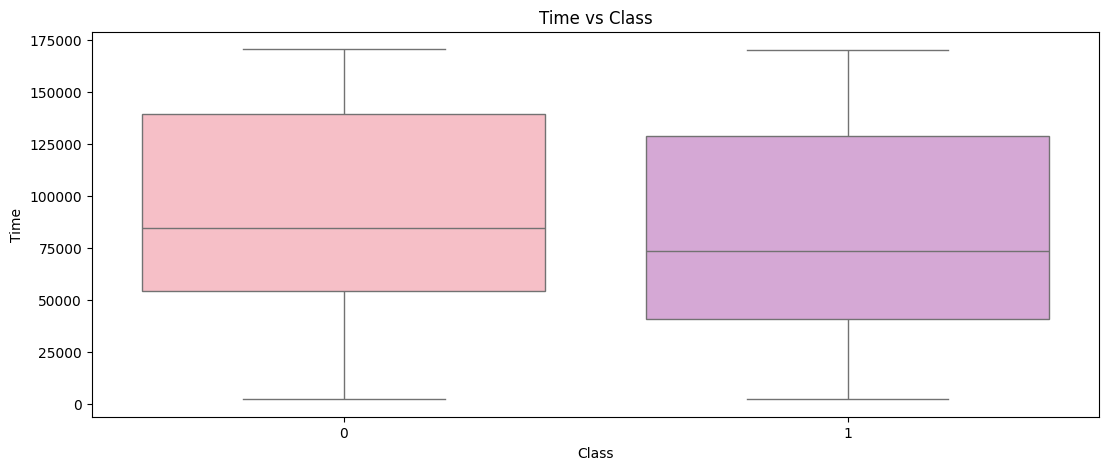

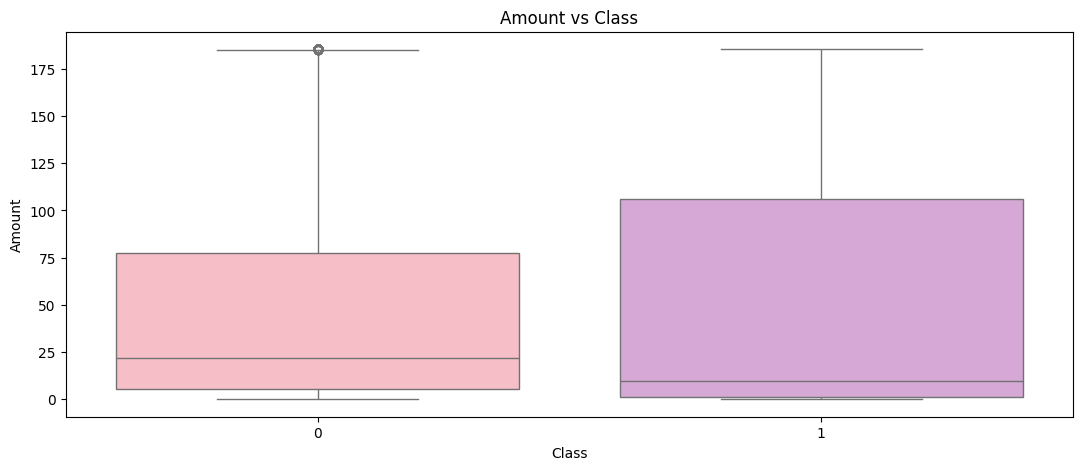

In [ ]:
colors = ["lightpink", "plum" , "purple"]

for col in num_cols:
    plt.figure(figsize=(13,5))
    sns.boxplot(x="Class", y=col, data=df , color=colors[i] , palette=["lightpink", "plum"])
    plt.title(f"{col} vs Class")
plt.show()

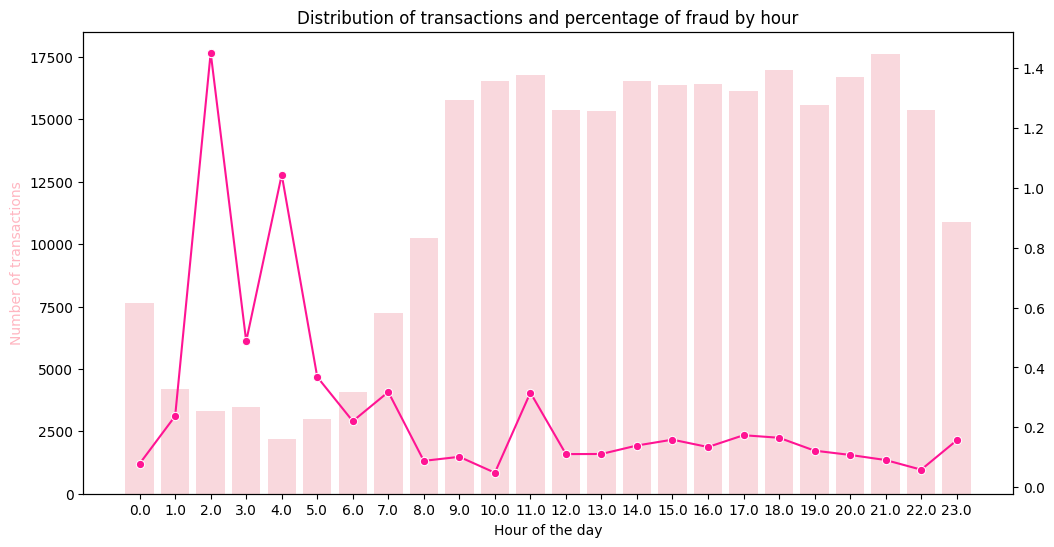

In [ ]:
df_cleaned["Hour"] = (df_cleaned["Time"] // 3600) % 24
fraud_by_hour = df_cleaned.groupby("Hour")["Class"].mean() * 100
transactions_by_hour = df_cleaned.groupby("Hour")["Class"].count()
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(x=fraud_by_hour.index, y= transactions_by_hour.values, color="lightpink", ax= ax1, alpha=0.6)
ax1.set_ylabel("Number of transactions", color="lightpink")
ax1.set_xlabel("Hour of the day")
ax2 = ax1.twinx()
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, color="deeppink", marker="o", ax=ax2)
plt.title("Distribution of transactions and percentage of fraud by hour")
plt.show()

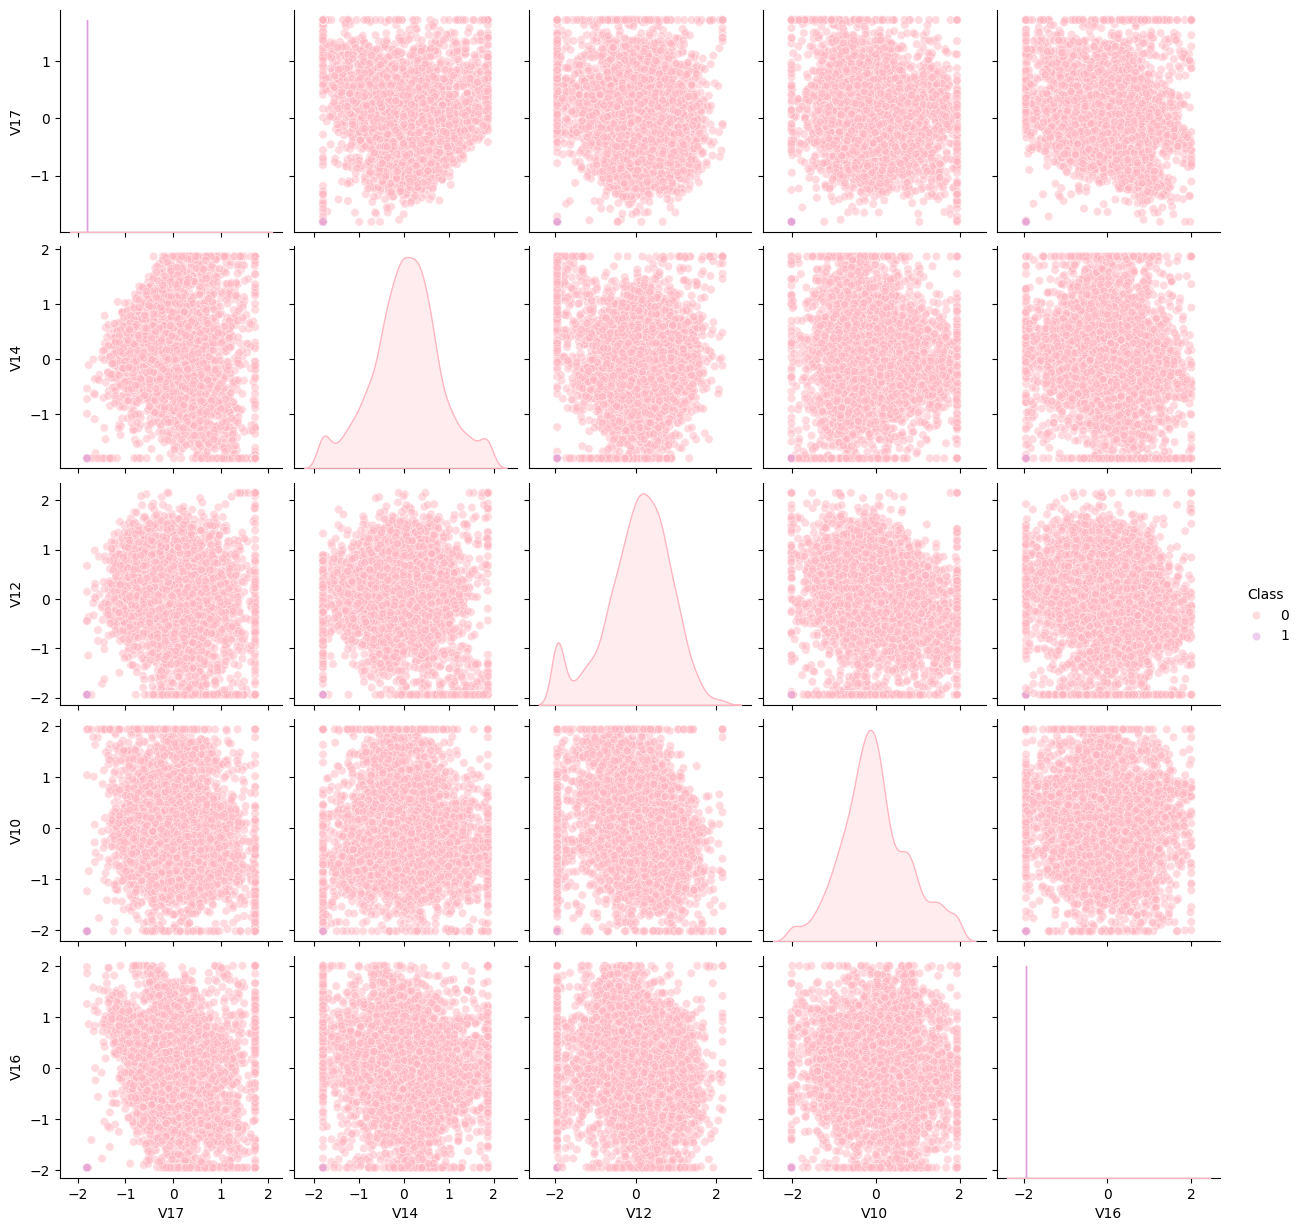

In [ ]:
cols = ['V17', 'V14', 'V12', 'V10', 'V16', 'Class']

sampled_df = df[cols].sample(n=5000, random_state=42)

sns.pairplot(
    sampled_df,
    hue="Class",
    diag_kind="kde",
    plot_kws={'alpha':0.5},
    palette=["lightpink", "plum"]
)
plt.show()

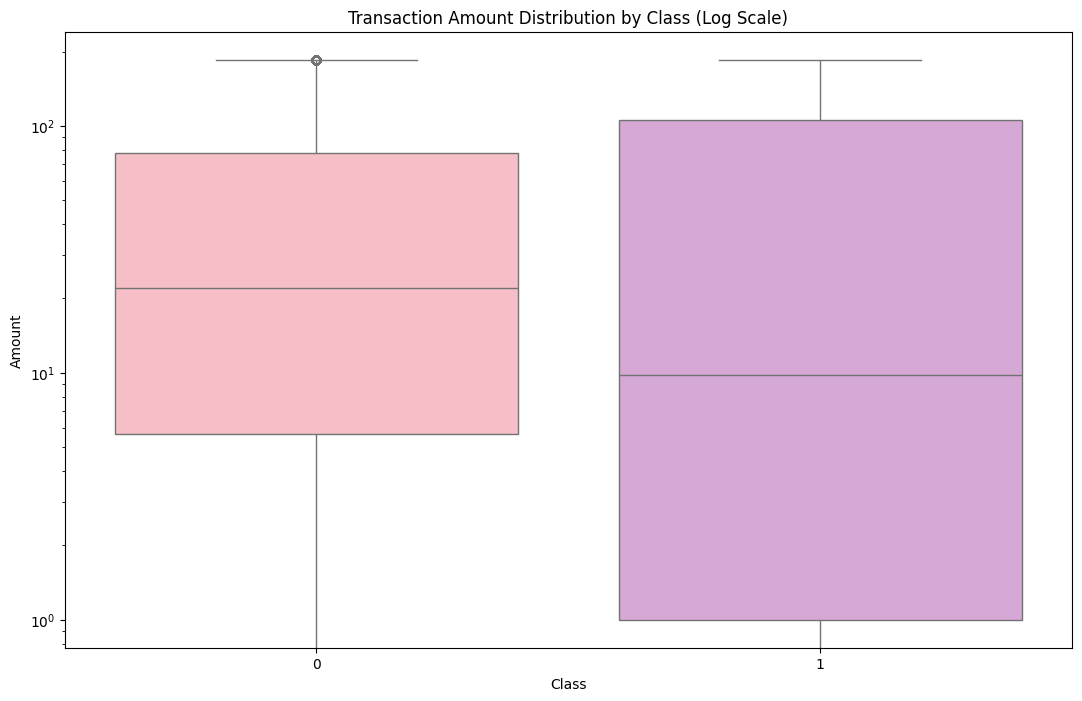

In [ ]:
plt.figure(figsize=(13,8))
sns.boxplot(
    x=df['Class'].astype(str),
    y='Amount',
    data=df,
    palette=["lightpink", "plum"]
)
plt.yscale('log')
plt.title('Transaction Amount Distribution by Class (Log Scale)')
plt.show()

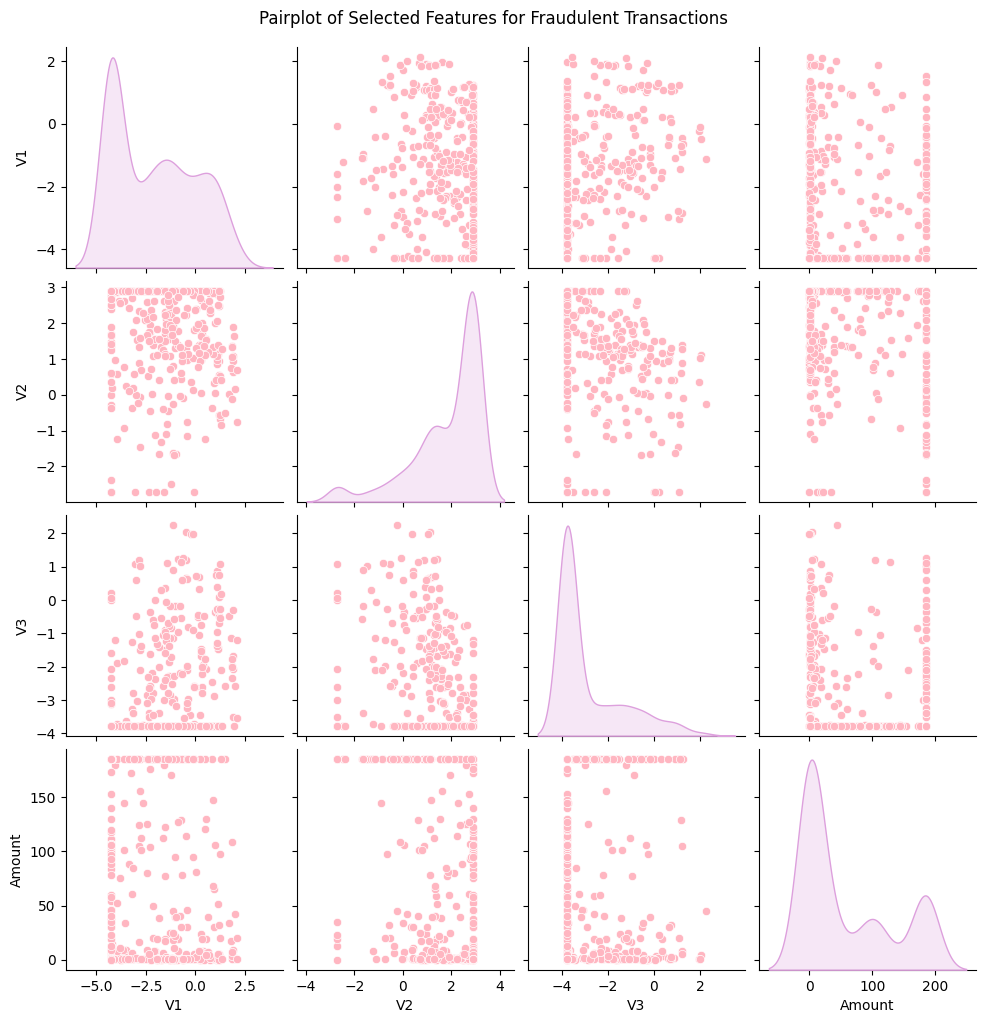

In [ ]:
sns.pairplot(
    df[df['Class'] == 1][['V1', 'V2', 'V3', 'Amount']],
    diag_kind='kde',
    plot_kws={'color': 'lightpink'},
    diag_kws={'color': 'plum'}
)
plt.suptitle('Pairplot of Selected Features for Fraudulent Transactions', y=1.02)
plt.show()

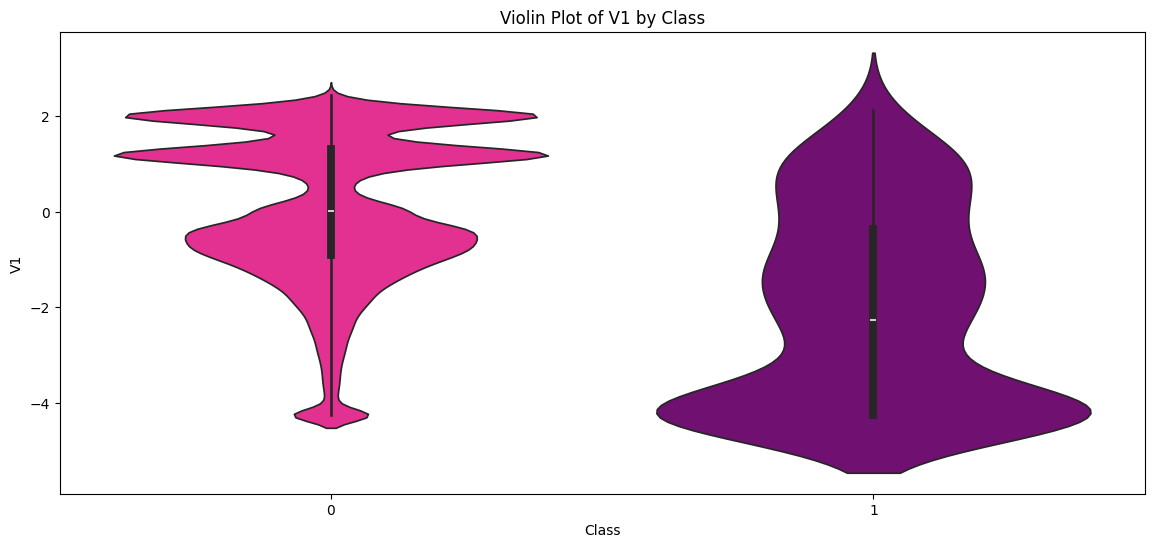

In [ ]:
plt.figure(figsize=(14,6))
sns.violinplot(x='Class', y='V1', data=df, palette=['deeppink', 'purple'])
plt.title('Violin Plot of V1 by Class')
plt.show()

# Data Splitting

In [ ]:
x = df.drop('Class', axis= 1)
y = df['Class']

In [ ]:
y.value_counts()

Class
0    283234
1       473
Name: count, dtype: int64

In [ ]:
y.value_counts().round()/len(df)*100

Class
0    99.833279
1     0.166721
Name: count, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42,stratify=y)

# Standardization

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[-1.92183377,  0.76976879, -0.6408783 , ..., -0.22902886,
         0.00693438, -0.19372639],
       [-1.00655017,  0.67565219,  0.58770953, ..., -0.0784452 ,
         0.16899699, -0.80080175],
       [ 0.83717081,  1.10666604, -0.47856802, ..., -0.77523004,
        -0.59975075,  1.10809504],
       ...,
       [ 1.59475138,  1.11250483, -0.61316468, ...,  0.47827323,
        -0.25621351, -0.20502833],
       [ 0.82129774, -0.17013327,  0.56005952, ...,  1.8184545 ,
         1.79558273, -0.61948642],
       [ 1.00686296,  1.20929253, -0.00881441, ..., -0.51864867,
        -0.40584614, -0.69359482]])

# SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

In [ ]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(x_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = model.predict(x_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56647
           1       0.04      0.92      0.08        95

    accuracy                           0.97     56742
   macro avg       0.52      0.94      0.53     56742
weighted avg       1.00      0.97      0.98     56742



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[54746  1901]
 [    8    87]]


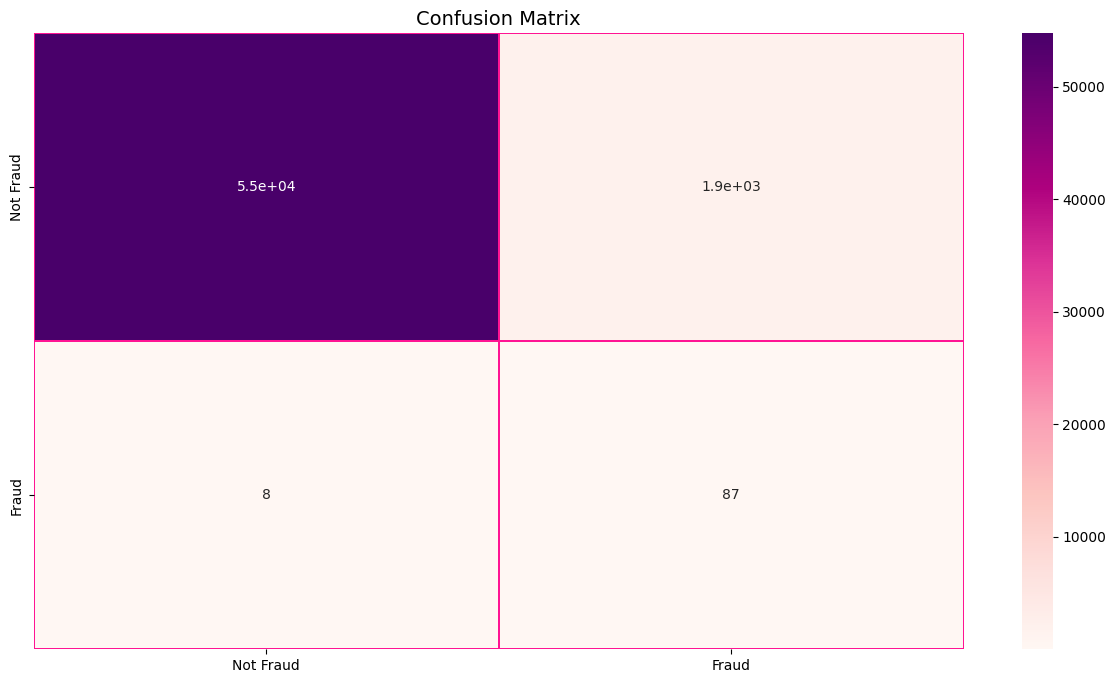

In [ ]:
fig, (axis) = plt.subplots(ncols=1, figsize=(15, 8))
sns.heatmap(confusion_matrix(y_test, y_pred),
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,
            ax=axis,
            linewidths=0.2,
            linecolor="deeppink",
            cmap="RdPu")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Up-Scaling Technique

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_scaled, y_train)

print(f"Up-sampled class distribution: {Counter(y_train_upsampled)}")

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_upsampled, y_train_upsampled)

Up-sampled class distribution: Counter({0: 226587, 1: 226587})


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = model.predict(x_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56647
           1       0.04      0.92      0.08        95

    accuracy                           0.97     56742
   macro avg       0.52      0.94      0.53     56742
weighted avg       1.00      0.97      0.98     56742



# Down-Sampling Techniques

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)
X_train_downsampled, y_train_downsampled = rus.fit_resample(x_train_scaled, y_train)

print(f"Down-sampled class distribution: {Counter(y_train_downsampled)}")

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_downsampled, y_train_downsampled)

Down-sampled class distribution: Counter({0: 378, 1: 378})


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = model.predict(x_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56647
           1       0.03      0.92      0.06        95

    accuracy                           0.95     56742
   macro avg       0.52      0.93      0.52     56742
weighted avg       1.00      0.95      0.97     56742



# Hybrid Technique (Down-Sampling with SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(x_train_scaled, y_train)

smote = SMOTE(random_state=42)
X_train_hybrid, y_train_hybrid = smote.fit_resample(X_train_rus, y_train_rus)

print(f"Hybrid-sampled class distribution: {Counter(y_train_hybrid)}")

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_hybrid, y_train_hybrid)

Hybrid-sampled class distribution: Counter({0: 378, 1: 378})


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = model.predict(x_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56647
           1       0.03      0.92      0.06        95

    accuracy                           0.95     56742
   macro avg       0.52      0.93      0.52     56742
weighted avg       1.00      0.95      0.97     56742



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[53993  2654]
 [    8    87]]


In [ ]:
cm = confusion_matrix(y_test, y_pred)
fig = go.Figure(data=go.Heatmap(
    z=cm,
    x=['Not Fraud', 'Fraud'],
    y=['Not Fraud', 'Fraud'],
    colorscale=[[0, 'pink'], [1, 'deeppink']],
    hoverongaps=False,
    text=cm,
    texttemplate="%{text}",
    textfont={"size":16},
))

fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Class',
    yaxis_title='Actual Class',
    xaxis={'showgrid': False, 'zeroline': False, 'tickmode': 'array', 'tickvals': [0, 1], 'ticktext': ['Not Fraud', 'Fraud']},
    yaxis={'showgrid': False, 'zeroline': False, 'tickmode': 'array', 'tickvals': [0, 1], 'ticktext': ['Not Fraud', 'Fraud'], 'autorange': 'reversed'} ,
    width=1300,
    height=800,
)

fig.show()